# Project Team ID : PTID-CDS-DEC-23-1729
# Batch : Aug 28 - CDS & 3rd July-CDS 

# Project : PRCP- 1001- RiceLeaf disease detection

## Business case :  Rice Leaf Disease Detection Model Using Convolutional Neural Network (CNN)

## Problem Statement

#### Rice leaf diseases, such as leaf blast, bacterial leaf blight, and brown spot, among others, pose a severe threat to rice cultivation. The manual detection and diagnosis of these diseases are time-consuming, often inaccurate, and highly dependent on the expertise of agricultural specialists. This leads to delayed responses in disease management and, consequently, reduced crop yields and economic losses for farmers.

## Tasks

**Task 1**:-Prepare a complete data analysis report on the given data.

**Task 2**:-Create a model which can classify the three major attacking diseases of
rice plants like leaf blast, bacterial blight and brown spot.

**Task 3**:- Analyze various techniques like Data Augmentation, etc and create a
report on that.

### Domain Analysis

    The Riceleaf, a crucial part of the rice-producing crop, varies in size and shape based on the rice variety and environmental factors. Its health is pivotal in determining the overall crop health. Regular monitoring is essential as changes in leaf characteristics can signal diseases, pest infestations, or environmental stress.

    Our project focuses on detecting three significant issues affecting rice leaf health:

1. **Bacterial Leaf Blight:** Initially marked by light green to greyish-green leaves with water-soaked streaks, bacterial blight progresses to form larger, yellowish lesions with uneven edges. This leads to yellowing, wilting, and eventual death of the leaves.

2. **Brown Spot:** Characterized by numerous prominent spots on the leaves, brown spot can lead to the complete demise of the affected leaf.

3. **Leaf Smut:** While relatively minor, leaf smut is a widespread disease in rice. The fungus causes slightly raised, angular, black spots (sori) on both sides of the leaves.

    
        Our dataset comprises a total of 119 images, evenly distributed among these three diseases. The aim is to analyze this data comprehensively to develop effective strategies for detecting and addressing these issues, ensuring the optimal health of rice leaves and the overall crop.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

### Setup Environment

In [3]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 32
epochs = 30

### Loading image data

In [4]:
data = tf.keras.utils.image_dataset_from_directory(directory=r'C:\Users\HYBRID SYSTEMS\Desktop\project\Rice leaf project',
                                                  labels='inferred',label_mode='int',class_names=None,color_mode='rgb',image_size=input_shape_2D,seed=seed)

Found 119 files belonging to 3 classes.


In [5]:
# Print class names

class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

### Visualise Images

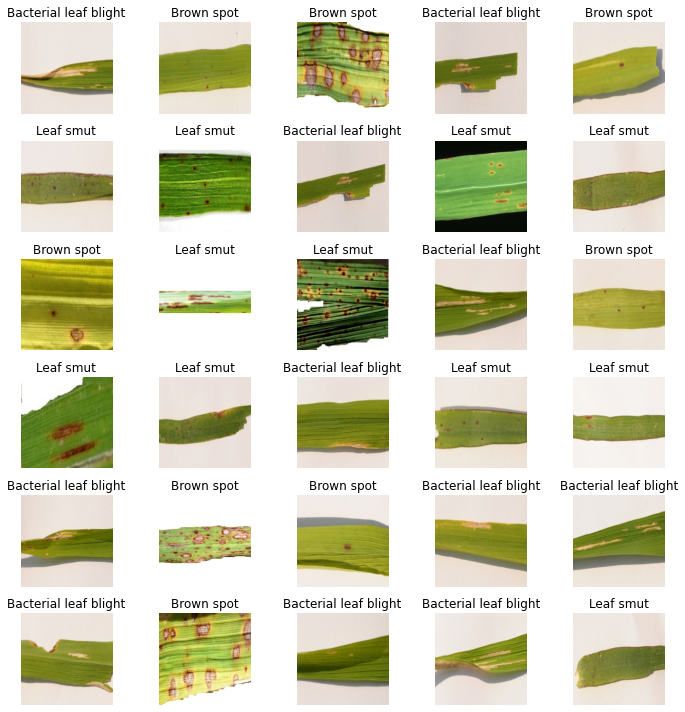

In [6]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(30): 
        plt.subplot(6,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

### Data Preprocessing

In [23]:
x = []
y = []

for images , labels in data:
    x.append(images.numpy())
    y.append(labels.numpy())

In [24]:
x = np.concatenate(x,axis=0)
y = np.concatenate(y,axis=0)

In [25]:
x

array([[[[236.      , 225.      , 219.      ],
         [235.      , 225.      , 216.      ],
         [235.      , 224.      , 218.      ],
         ...,
         [239.94286 , 231.94286 , 228.94286 ],
         [238.06563 , 230.49835 , 225.87204 ],
         [238.      , 229.      , 224.      ]],

        [[236.      , 225.      , 219.      ],
         [235.      , 225.      , 216.      ],
         [234.88617 , 225.88617 , 218.88617 ],
         ...,
         [239.88623 , 232.88623 , 226.88623 ],
         [238.4399  , 230.4399  , 227.4399  ],
         [238.      , 229.      , 224.      ]],

        [[235.      , 225.      , 216.      ],
         [235.06438 , 224.55322 , 217.0867  ],
         [234.88617 , 225.88617 , 218.88617 ],
         ...,
         [237.83061 , 232.83061 , 226.83061 ],
         [238.      , 230.      , 227.      ],
         [236.31836 , 229.31836 , 223.31836 ]],

        ...,

        [[235.30443 , 225.30443 , 216.30443 ],
         [236.      , 225.      , 219.      ]

In [26]:
y

array([0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2,
       1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 0, 2, 2, 0, 1, 2, 1])

In [27]:
# Data Normalization

x = x.astype('float32')/255
x

array([[[[0.9254902 , 0.88235295, 0.85882354],
         [0.92156863, 0.88235295, 0.84705883],
         [0.92156863, 0.8784314 , 0.85490197],
         ...,
         [0.94095236, 0.9095798 , 0.8978151 ],
         [0.9335907 , 0.9039151 , 0.8857727 ],
         [0.93333334, 0.8980392 , 0.8784314 ]],

        [[0.9254902 , 0.88235295, 0.85882354],
         [0.92156863, 0.88235295, 0.84705883],
         [0.92112225, 0.88582814, 0.85837716],
         ...,
         [0.94073033, 0.91327935, 0.88974994],
         [0.9350584 , 0.90368587, 0.89192116],
         [0.93333334, 0.8980392 , 0.8784314 ]],

        [[0.92156863, 0.88235295, 0.84705883],
         [0.92182106, 0.88060087, 0.8513204 ],
         [0.92112225, 0.88582814, 0.85837716],
         ...,
         [0.93266904, 0.9130612 , 0.8895318 ],
         [0.93333334, 0.9019608 , 0.8901961 ],
         [0.9267387 , 0.8992877 , 0.8757583 ]],

        ...,

        [[0.92276245, 0.88354677, 0.84825265],
         [0.9254902 , 0.88235295, 0.85882354]

In [28]:
# Splitting data

x_train,x_test = x[:100],x[100:]
y_train,y_test = y[:100],y[100:]

In [29]:
x_train.shape , x_test.shape

((100, 224, 224, 3), (19, 224, 224, 3))

In [30]:
y_train.shape , y_test.shape

((100,), (19,))

#### Encoding

In [31]:
# Using one-hot encoding to encode the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,len(class_names))
y_test = to_categorical(y_test,len(class_names))

In [32]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

## Model Architecture

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

1) **ReLU (Rectified Linear Unit):** Utilizing ReLU helps curb the exponential growth of computational requirements within a neural network.

2) **Derivative Characteristics:** ReLU has a derivative of 0 or 1 based on whether its input is negative or positive.

3) **Conv2D Layer:** This layer establishes a neural network layer with filters applied to the input.

4) **MaxPooling:** This process involves a kernel that retains pixels of higher intensity while reducing the image size to half of the original dimensions.

5) **Dropout:** Neurons are deactivated during training to mitigate overfitting issues.

6) **Flatten Layer:** Converts 2D data into a 1D array for seamless processing.

7) **Output Layer with 'Softmax':** The output layer is configured with neurons and uses the 'softmax' activation function, which is particularly suited for multi-class classification problems.

8) **Dense Layer:** Represents a standard Artificial Neural Network (ANN) configuration.

### Model Creation

In [34]:
model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=input_shape_3D))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      432       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4608      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18432     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

### Model Training

In [36]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
from keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.hdf5',
                               save_best_only = False,
                               mode = 'auto',
                               monitor='val_accuracy')

In [27]:
history = model.fit(x_train,y_train,batch_size=32,epochs=63,validation_data=(x_test,y_test),callbacks=[check_pointer],verbose=1,shuffle=True)

Epoch 1/63
4/4 [==============================] - 5s 731ms/step - loss: 18.6965 - accuracy: 0.3700 - val_loss: 2.9268 - val_accuracy: 0.3684
Epoch 2/63
4/4 [==============================] - 2s 499ms/step - loss: 3.4243 - accuracy: 0.3200 - val_loss: 1.8911 - val_accuracy: 0.3158
Epoch 3/63
4/4 [==============================] - 2s 500ms/step - loss: 2.2531 - accuracy: 0.3200 - val_loss: 1.2729 - val_accuracy: 0.3158
Epoch 4/63
4/4 [==============================] - 2s 491ms/step - loss: 1.4539 - accuracy: 0.3000 - val_loss: 1.0976 - val_accuracy: 0.3684
Epoch 5/63
4/4 [==============================] - 2s 498ms/step - loss: 1.1212 - accuracy: 0.3500 - val_loss: 1.1020 - val_accuracy: 0.3158
Epoch 6/63
4/4 [==============================] - 2s 505ms/step - loss: 1.1624 - accuracy: 0.3400 - val_loss: 1.1031 - val_accuracy: 0.3158
Epoch 7/63
4/4 [==============================] - 2s 504ms/step - loss: 1.1485 - accuracy: 0.3400 - val_loss: 1.1063 - val_accuracy: 0.3158
Epoch 8/63
4/4 [===

###  Load the Model with the Best Validation Accuracy

In [38]:
model.load_weights('model.weights.best.hdf5')

## Predict the Model

In [39]:
y_pred = model.predict(x_test)
rice_leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 0s 205ms/step


###  Visualise some prediction

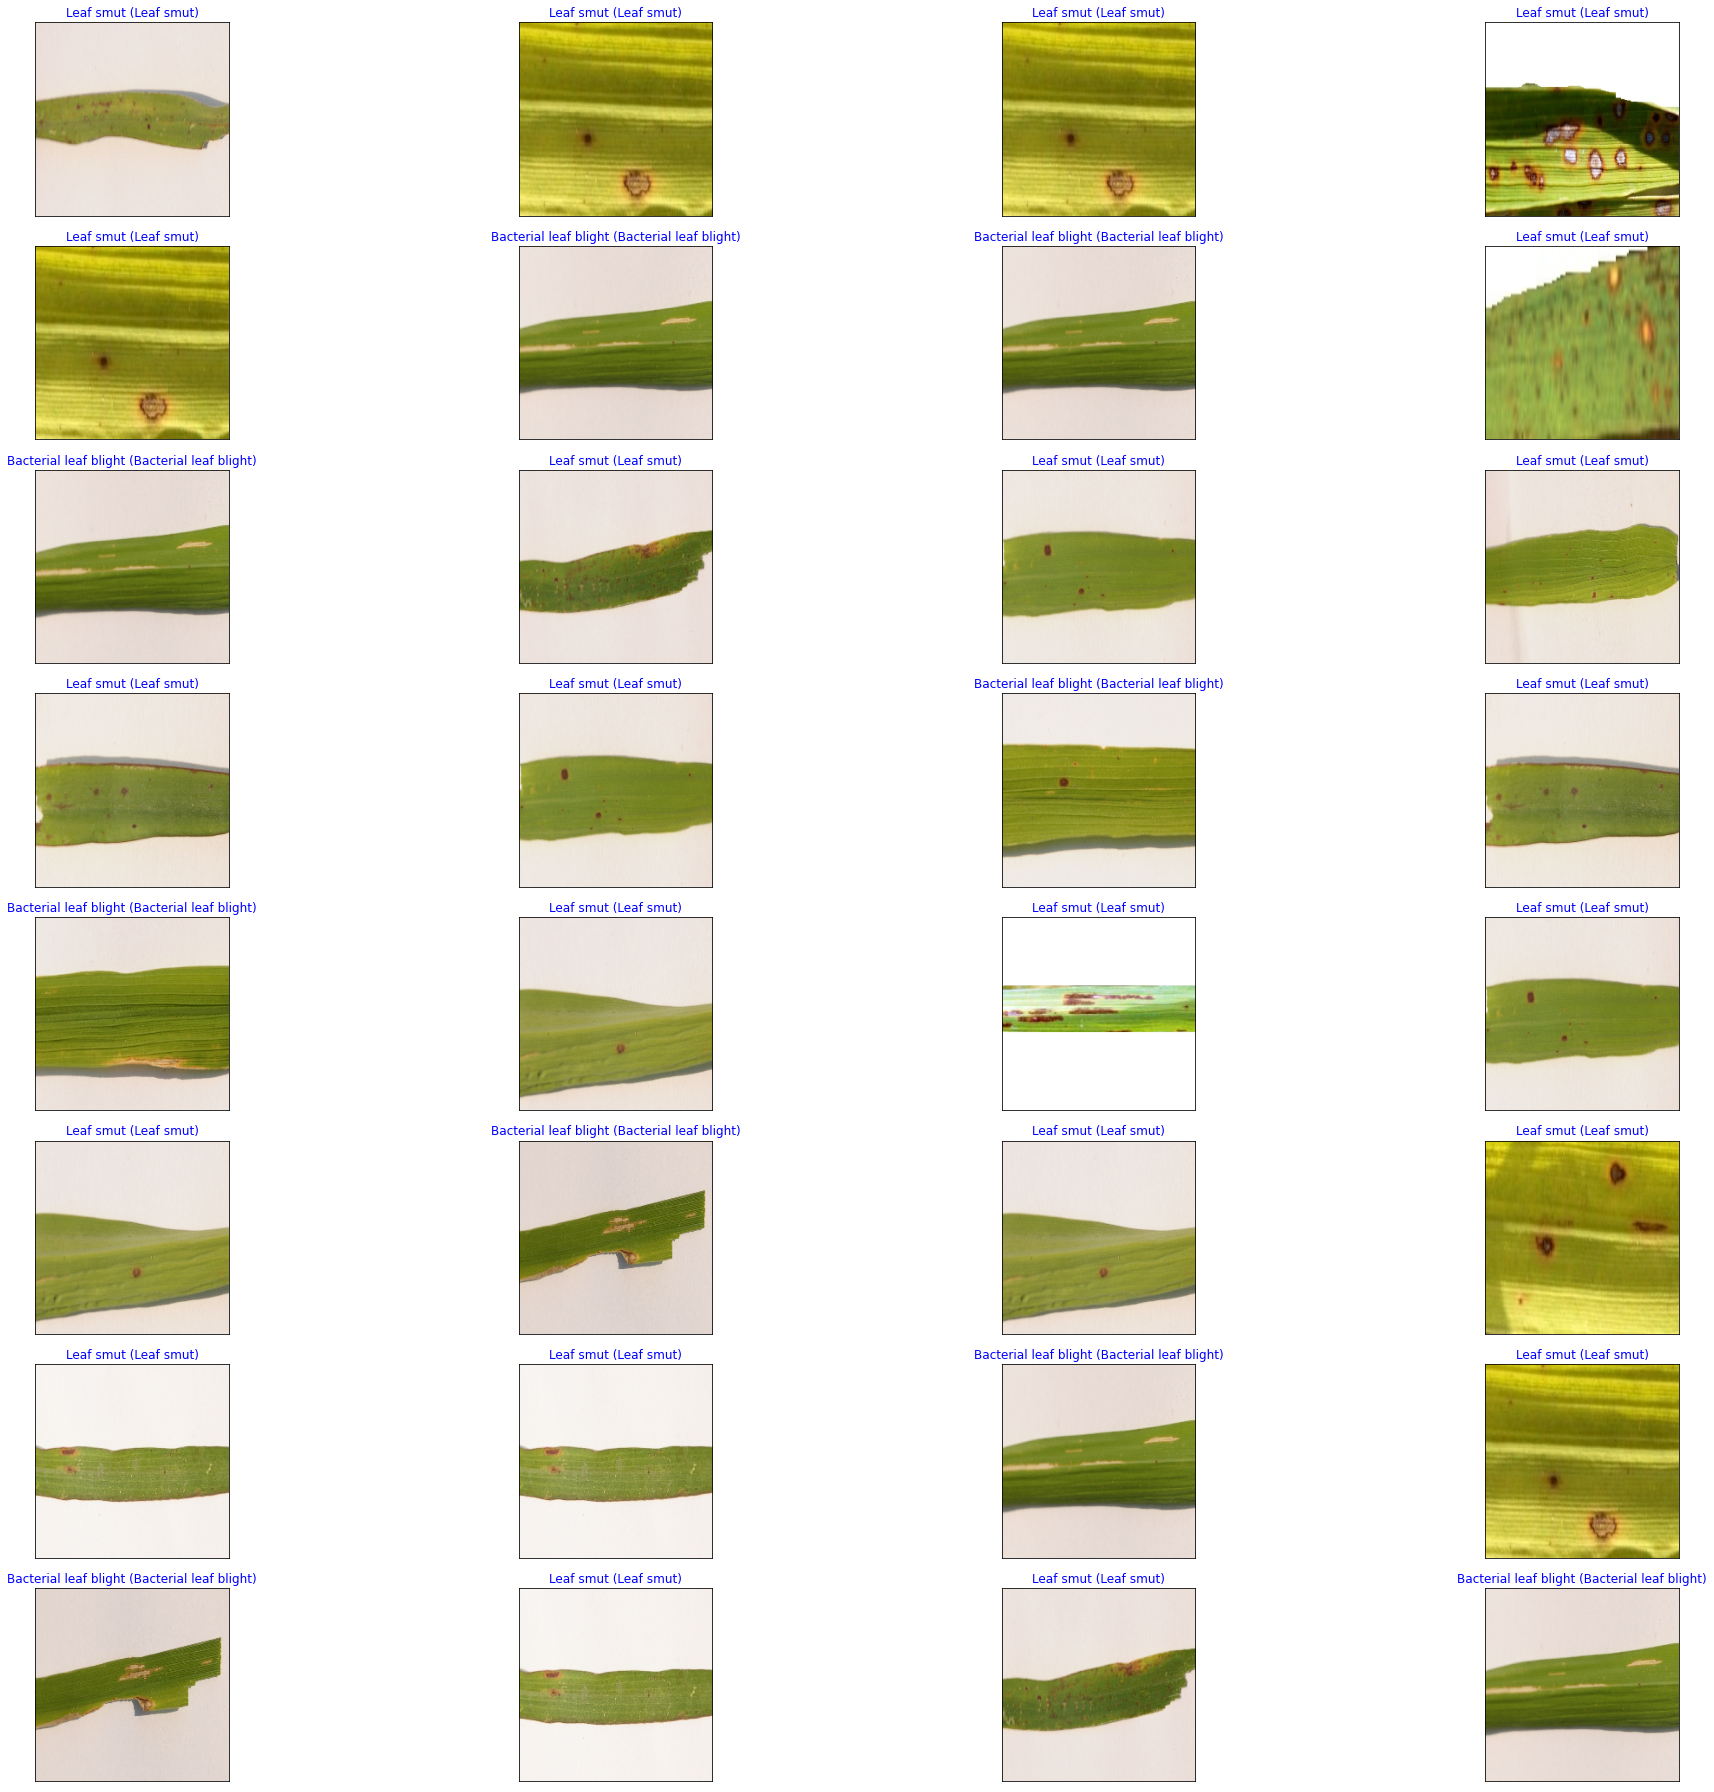

In [40]:
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    
    
    pred_idx = np.argmax(y_pred[idx])
    
    true_idx = np.argmax(y_pred[idx])
    
    ax.set_title("{} ({})".format(rice_leaf_class[pred_idx], rice_leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

### Evaluate Model Performance

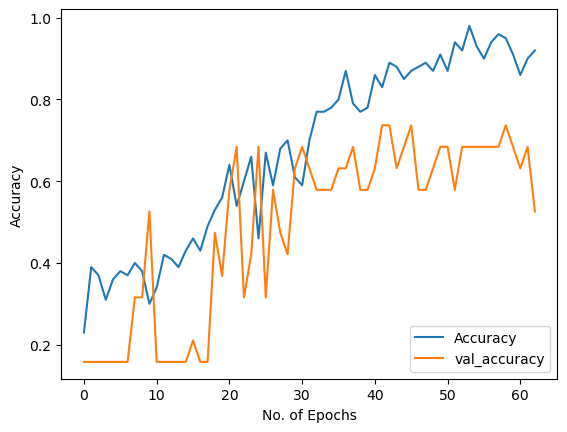

In [24]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

In [25]:
score = model.evaluate(x_test,y_test)
accuracy = score[1]*100

print("Accuracy: ",accuracy)

1/1 [==============================] - 0s 106ms/step - loss: 1.0879 - accuracy: 0.5263
Accuracy:  52.63158082962036


    ** Above model gives accuracy of 52%

### Applying the Hyper Parameter tuning on CNN

In [26]:
model_hp = Sequential()
model_hp.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=(224,224,3)))
#16 filters with 3X3 kernel with padding size same as input and output

model_hp.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(3,3)))

model_hp.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(3,3)))

model_hp.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(2,2)))

model_hp.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp.add(MaxPooling2D(pool_size=(2,2)))

model_hp.add(Dropout(0.3)) # 30% neurons are deactivated to avoid overfitting
model_hp.add(Flatten())    # Coverting data into 1D array
model_hp.add(Dropout(0.5)) # 50% neurons are deactivated to avoid overfitting
model_hp.add(Dense(300,activation='relu'))
model_hp.add(Dense(100,activation='relu')) #100 neurons with relu AF
model_hp.add(Dense(3,activation='softmax')) # 3 output layers as neurons with softmax AF(multi classifiaction)


model_hp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      432       
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      4608      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 64)        18432     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)      

In [28]:
#hyperparameter tuning -Learning Rate
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [29]:
model_hp.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
from keras.callbacks import ModelCheckpoint
check_pointer1 = ModelCheckpoint(filepath='model.weights.best.hdf6' ,
                                save_best_only=True ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [32]:
history1 = model_hp.fit(x_train,y_train,batch_size=32 ,epochs=60 ,validation_data=(x_test,y_test) ,callbacks=[check_pointer1] ,verbose=1 ,shuffle=True)

Epoch 1/60
4/4 [==============================] - ETA: 0s - loss: 1.1056 - accuracy: 0.2900INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 11s 2s/step - loss: 1.1056 - accuracy: 0.2900 - val_loss: 1.1035 - val_accuracy: 0.1053
Epoch 2/60
4/4 [==============================] - ETA: 0s - loss: 1.0929 - accuracy: 0.3800INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 1.0929 - accuracy: 0.3800 - val_loss: 1.1210 - val_accuracy: 0.1579
Epoch 3/60
4/4 [==============================] - ETA: 0s - loss: 1.0938 - accuracy: 0.3900INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 1.0938 - accuracy: 0.3900 - val_loss: 1.1393 - val_accuracy: 0.3158
Epoch 4/60
4/4 [==============================] - 4s 972ms/step - loss: 1.0984 - accuracy: 0.4100 - val_loss: 1.1494 - val_accuracy: 0.3158
Epoch 5/60
4/4 [==============================] - 4s 956ms/step - loss: 1.0970 - accuracy: 0.3200 - val_loss: 1.1539 - val_accuracy: 0.2105
Epoch 6/60
4/4 [==============================] - 4s 941ms/step - loss: 1.0830 - accuracy: 0.3900 - val_loss: 1.1549 - val_accuracy: 0.1579
Epoch 7/60
4/4 [==============================] - 4s 910ms/step - loss: 1.0872 - accuracy: 0.3900 - val_loss: 1.1528 - val_accuracy: 0.1579
Epoch 8/60
4/4 [==============================] - 4s 968ms/step - loss: 1.0784 - accuracy: 0.3700 - val_loss: 1.1401 - val_accuracy: 0.1579
Epoch 9/60
4/4 [==============================] - 4s 928ms/step - loss: 1.0834 - accuracy: 0.3800 - val_loss: 1.1452 - val_accuracy: 0.1579
Epoch 10/60
4/4 [=================

INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 1.0302 - accuracy: 0.5300 - val_loss: 1.0990 - val_accuracy: 0.3684
Epoch 18/60
4/4 [==============================] - 4s 896ms/step - loss: 1.0134 - accuracy: 0.5400 - val_loss: 1.0539 - val_accuracy: 0.3684
Epoch 19/60
4/4 [==============================] - ETA: 0s - loss: 0.9945 - accuracy: 0.5800INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 6s 2s/step - loss: 0.9945 - accuracy: 0.5800 - val_loss: 1.0999 - val_accuracy: 0.4211
Epoch 20/60
4/4 [==============================] - 4s 918ms/step - loss: 0.9952 - accuracy: 0.5500 - val_loss: 1.1218 - val_accuracy: 0.3684
Epoch 21/60
4/4 [==============================] - 4s 871ms/step - loss: 0.9607 - accuracy: 0.5800 - val_loss: 1.0850 - val_accuracy: 0.2632
Epoch 22/60
4/4 [==============================] - 4s 1s/step - loss: 0.9374 - accuracy: 0.5600 - val_loss: 0.9983 - val_accuracy: 0.4211
Epoch 23/60
4/4 [==============================] - ETA: 0s - loss: 0.9058 - accuracy: 0.6000INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 0.9058 - accuracy: 0.6000 - val_loss: 0.9760 - val_accuracy: 0.4737
Epoch 24/60
4/4 [==============================] - 4s 918ms/step - loss: 0.9064 - accuracy: 0.5700 - val_loss: 0.8973 - val_accuracy: 0.4737
Epoch 25/60
4/4 [==============================] - 4s 875ms/step - loss: 0.8781 - accuracy: 0.5900 - val_loss: 1.0562 - val_accuracy: 0.3158
Epoch 26/60
4/4 [==============================] - 4s 828ms/step - loss: 0.8761 - accuracy: 0.5400 - val_loss: 1.1133 - val_accuracy: 0.3158
Epoch 27/60
4/4 [==============================] - ETA: 0s - loss: 0.8929 - accuracy: 0.5700INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 0.8929 - accuracy: 0.5700 - val_loss: 0.9750 - val_accuracy: 0.5789
Epoch 28/60
4/4 [==============================] - ETA: 0s - loss: 0.8312 - accuracy: 0.6800INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 6s 2s/step - loss: 0.8312 - accuracy: 0.6800 - val_loss: 0.8528 - val_accuracy: 0.6316
Epoch 29/60
4/4 [==============================] - 4s 881ms/step - loss: 0.8019 - accuracy: 0.6200 - val_loss: 0.8781 - val_accuracy: 0.4737
Epoch 30/60
4/4 [==============================] - 4s 952ms/step - loss: 0.8239 - accuracy: 0.5900 - val_loss: 0.8149 - val_accuracy: 0.5789
Epoch 31/60
4/4 [==============================] - 4s 928ms/step - loss: 0.7530 - accuracy: 0.7100 - val_loss: 0.9109 - val_accuracy: 0.5789
Epoch 32/60
4/4 [==============================] - 4s 898ms/step - loss: 0.8105 - accuracy: 0.6700 - val_loss: 0.9156 - val_accuracy: 0.5263
Epoch 33/60
4/4 [==============================] - 4s 829ms/step - loss: 0.7159 - accuracy: 0.7100 - val_loss: 0.7567 - val_accuracy: 0.6316
Epoch 34/60
4/4 [==============================] - ETA: 0s - loss: 0.7053 - accuracy: 0.6900INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 0.7053 - accuracy: 0.6900 - val_loss: 0.7093 - val_accuracy: 0.7368
Epoch 35/60
4/4 [==============================] - 4s 901ms/step - loss: 0.6639 - accuracy: 0.7300 - val_loss: 0.7332 - val_accuracy: 0.6842
Epoch 36/60
4/4 [==============================] - 4s 994ms/step - loss: 0.6412 - accuracy: 0.7400 - val_loss: 0.7513 - val_accuracy: 0.5789
Epoch 37/60
4/4 [==============================] - 4s 924ms/step - loss: 0.6261 - accuracy: 0.7600 - val_loss: 0.6081 - val_accuracy: 0.7368
Epoch 38/60
4/4 [==============================] - 4s 1s/step - loss: 0.6229 - accuracy: 0.7500 - val_loss: 0.7397 - val_accuracy: 0.5263
Epoch 39/60
4/4 [==============================] - 5s 1s/step - loss: 0.6372 - accuracy: 0.7300 - val_loss: 0.7241 - val_accuracy: 0.6842
Epoch 40/60
4/4 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.7300INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 0.5927 - accuracy: 0.7300 - val_loss: 0.5724 - val_accuracy: 0.7895
Epoch 41/60
4/4 [==============================] - 4s 926ms/step - loss: 0.5732 - accuracy: 0.7600 - val_loss: 0.6267 - val_accuracy: 0.7368
Epoch 42/60
4/4 [==============================] - 4s 932ms/step - loss: 0.5103 - accuracy: 0.7700 - val_loss: 0.7664 - val_accuracy: 0.6316
Epoch 43/60
4/4 [==============================] - 4s 918ms/step - loss: 0.6217 - accuracy: 0.7400 - val_loss: 0.8451 - val_accuracy: 0.5789
Epoch 44/60
4/4 [==============================] - 4s 939ms/step - loss: 0.5534 - accuracy: 0.7500 - val_loss: 0.6185 - val_accuracy: 0.7368
Epoch 45/60
4/4 [==============================] - ETA: 0s - loss: 0.5035 - accuracy: 0.8000INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 0.5035 - accuracy: 0.8000 - val_loss: 0.5412 - val_accuracy: 0.8421
Epoch 46/60
4/4 [==============================] - 4s 987ms/step - loss: 0.4943 - accuracy: 0.8200 - val_loss: 0.6594 - val_accuracy: 0.5789
Epoch 47/60
4/4 [==============================] - 4s 949ms/step - loss: 0.4589 - accuracy: 0.8200 - val_loss: 0.6279 - val_accuracy: 0.7368
Epoch 48/60
4/4 [==============================] - 4s 887ms/step - loss: 0.5046 - accuracy: 0.7900 - val_loss: 0.5605 - val_accuracy: 0.7368
Epoch 49/60
4/4 [==============================] - 4s 1s/step - loss: 0.4213 - accuracy: 0.8500 - val_loss: 0.8085 - val_accuracy: 0.5263
Epoch 50/60
4/4 [==============================] - 4s 1s/step - loss: 0.5078 - accuracy: 0.7400 - val_loss: 0.5288 - val_accuracy: 0.8421
Epoch 51/60
4/4 [==============================] - 4s 978ms/step - loss: 0.4634 - accuracy: 0.8400 - val_loss: 0.5767 - val_accuracy: 0.7368
Epoch 52/60
4/4 [=================

INFO:tensorflow:Assets written to: model.weights.best.hdf6\assets


4/4 [==============================] - 7s 2s/step - loss: 0.3483 - accuracy: 0.8700 - val_loss: 0.4750 - val_accuracy: 0.8947
Epoch 58/60
4/4 [==============================] - 4s 934ms/step - loss: 0.3603 - accuracy: 0.8500 - val_loss: 0.4322 - val_accuracy: 0.7895
Epoch 59/60
4/4 [==============================] - 4s 922ms/step - loss: 0.3258 - accuracy: 0.8800 - val_loss: 0.5946 - val_accuracy: 0.6842
Epoch 60/60
4/4 [==============================] - 4s 947ms/step - loss: 0.3928 - accuracy: 0.8000 - val_loss: 0.5866 - val_accuracy: 0.7368


In [34]:
model_hp.load_weights('model.weights.best.hdf6')

In [36]:
y_prediction1 = model_hp.predict(x_test)

leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# get the predicted class for each sample
predicted_classes1 = np.argmax(y_prediction1, axis=1)
print(predicted_classes1)

1/1 [==============================] - 0s 460ms/step
[1 2 2 0 1 1 1 0 0 2 1 1 0 2 2 0 1 2 1]


### Evaluating Tuning Model Performance

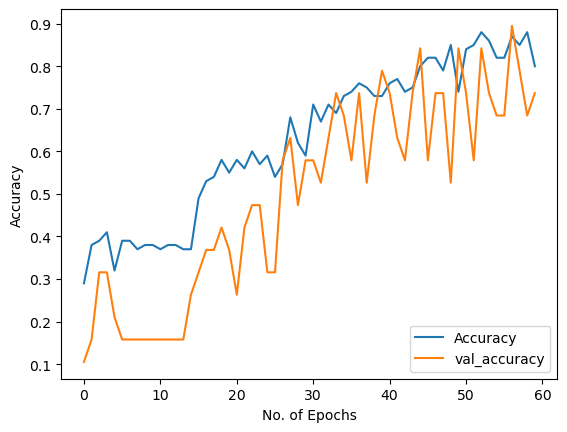

In [37]:
plt.plot(history1.history['accuracy'],label='Accuracy')
plt.plot(history1.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

In [39]:
test_Accuracy1 = model_hp.evaluate(x_test,y_test)
print(f"Model's Accuracy : {test_Accuracy1[1]*100}")

1/1 [==============================] - 0s 305ms/step - loss: 0.4750 - accuracy: 0.8947
Model's Accuracy : 89.47368264198303


**CNN model after hyper parameter gives an accuracy of 89%.**

### Visualize the Predicted Classes

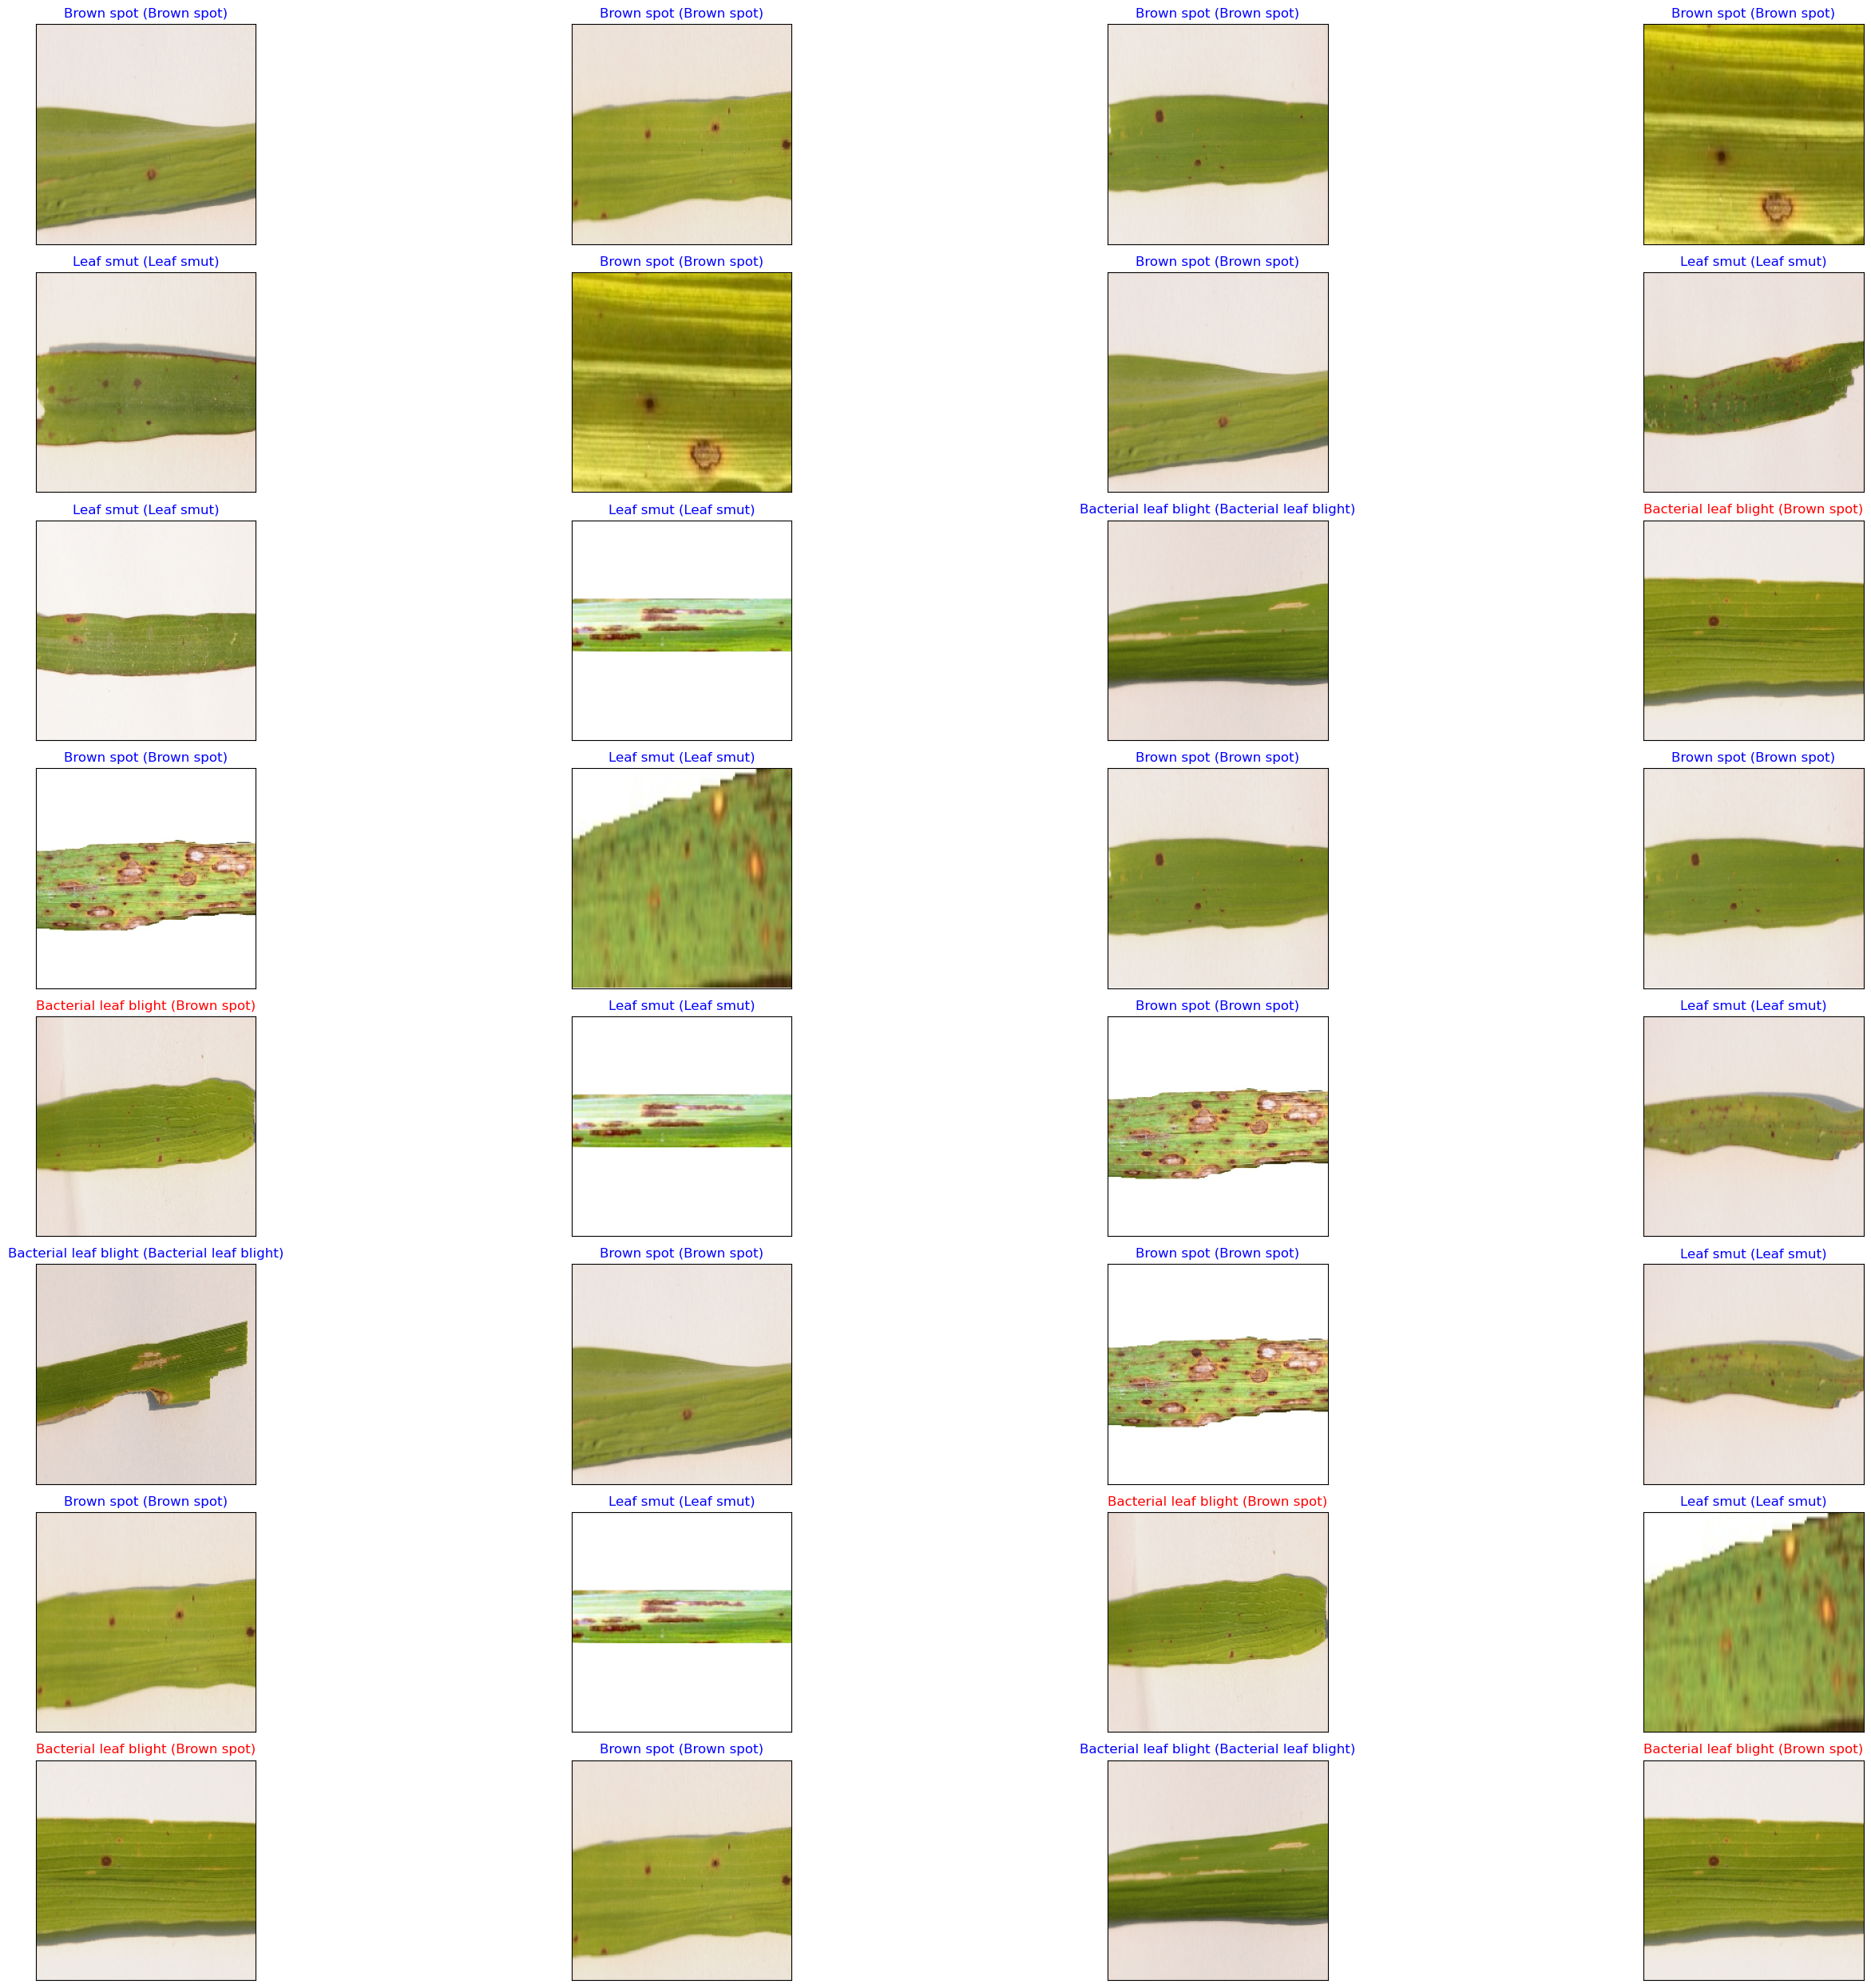

In [41]:
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))

    # Assuming 'y_prediction1' contains the model predictions
    pred_idx = np.argmax(y_prediction1[idx])

    true_idx = np.argmax(y_test[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

## Data Augmentation

### Visualising Augmented Images:

        ** We visualize augmented images to ensure they still represent the original classes has to be done in Data visualisation section

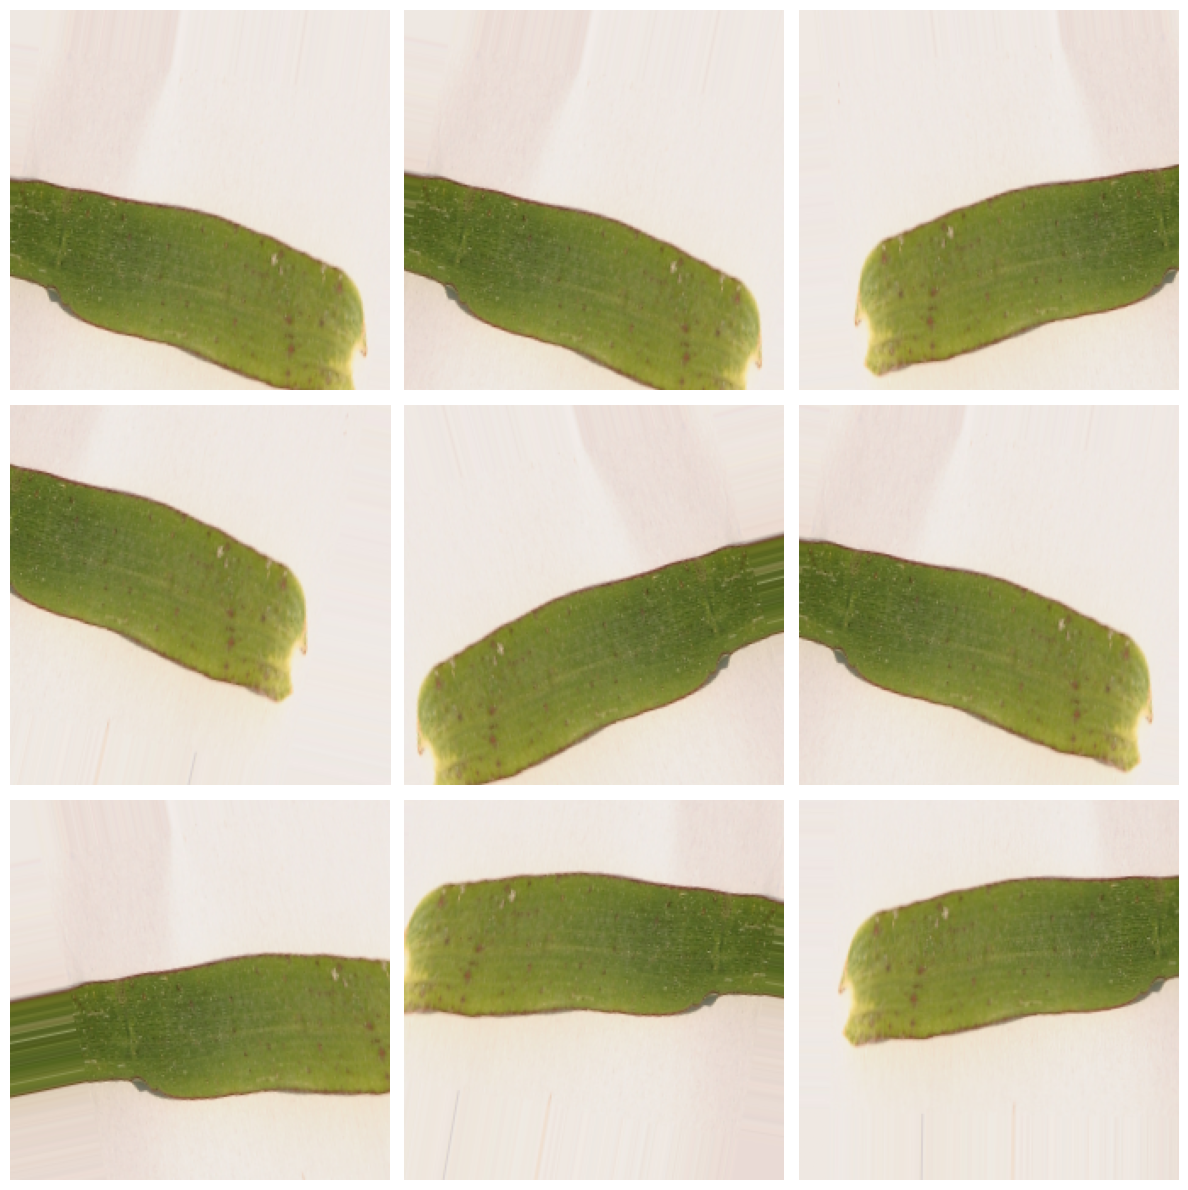

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

sample_image = x[2]
sample_image = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(12, 12))
for i, augmented_image in enumerate(data_generator.flow(sample_image, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')
    if i == 8:
        break
plt.tight_layout()
plt.show()

### Data Augmented Model

In [44]:
model_hp1 = Sequential()
model_hp1.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=(224,224,3)))
model_hp1.add(MaxPooling2D(pool_size=(3,3)))

model_hp1.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(3,3)))

model_hp1.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(3,3)))

model_hp1.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(2,2)))

model_hp1.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model_hp1.add(MaxPooling2D(pool_size=(2,2)))

model_hp1.add(Dropout(0.3))
model_hp1.add(Flatten())
model_hp1.add(Dropout(0.5))
model_hp1.add(Dense(300,activation='relu'))
model_hp1.add(Dense(100,activation='relu'))
model_hp1.add(Dense(3,activation='softmax'))


model_hp1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 16)      432       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 74, 74, 32)        4608      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 64)        18432     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 64)         

In [45]:
model_hp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
from keras.callbacks import ModelCheckpoint
check_pointer2 = ModelCheckpoint(filepath='model.weights.best.hdf7' ,
                                save_best_only=True ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [47]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### 1) roation_angle - an angle where the image is rotated and the algorithm is run. it goes from -45 to +45(exampe)
### 2) width& height_shift_range - randomly shifting the image horizontally and vertically. This helps the model tolerate small translations in the input data.
### 3) shear_range - maximum range of shear on the axis
### 4) fill_mode - "nearest," "constant," "reflect," and "wrap."

In [49]:
augmented_data = datagen.flow(x_train, y_train, batch_size=32)

In [51]:
history2 = model_hp1.fit(augmented_data, epochs=60, steps_per_epoch=len(x_train) // 32, validation_data=(x_test, y_test), callbacks=[check_pointer2], verbose=1, shuffle=True)

Epoch 1/60
3/3 [==============================] - ETA: 0s - loss: 1.1167 - accuracy: 0.3438INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


3/3 [==============================] - 8s 2s/step - loss: 1.1167 - accuracy: 0.3438 - val_loss: 1.1171 - val_accuracy: 0.1579
Epoch 2/60
3/3 [==============================] - ETA: 0s - loss: 1.0968 - accuracy: 0.3235INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


3/3 [==============================] - 5s 2s/step - loss: 1.0968 - accuracy: 0.3235 - val_loss: 1.1058 - val_accuracy: 0.3158
Epoch 3/60
3/3 [==============================] - 2s 588ms/step - loss: 1.0802 - accuracy: 0.4118 - val_loss: 1.1396 - val_accuracy: 0.1579
Epoch 4/60
3/3 [==============================] - 2s 983ms/step - loss: 1.1010 - accuracy: 0.3529 - val_loss: 1.1685 - val_accuracy: 0.1579
Epoch 5/60
3/3 [==============================] - 2s 529ms/step - loss: 1.0787 - accuracy: 0.3971 - val_loss: 1.2401 - val_accuracy: 0.1579
Epoch 6/60
3/3 [==============================] - 2s 523ms/step - loss: 1.1375 - accuracy: 0.3235 - val_loss: 1.1875 - val_accuracy: 0.3158
Epoch 7/60
3/3 [==============================] - 2s 526ms/step - loss: 1.1155 - accuracy: 0.3971 - val_loss: 1.1696 - val_accuracy: 0.3158
Epoch 8/60
3/3 [==============================] - 2s 989ms/step - loss: 1.0955 - accuracy: 0.3529 - val_loss: 1.2038 - val_accuracy: 0.3158
Epoch 9/60
3/3 [==================

INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


3/3 [==============================] - 5s 2s/step - loss: 1.1025 - accuracy: 0.4118 - val_loss: 1.0977 - val_accuracy: 0.3684
Epoch 16/60
3/3 [==============================] - ETA: 0s - loss: 1.0985 - accuracy: 0.3382INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


3/3 [==============================] - 5s 2s/step - loss: 1.0985 - accuracy: 0.3382 - val_loss: 1.0889 - val_accuracy: 0.5263
Epoch 17/60
3/3 [==============================] - 2s 965ms/step - loss: 1.0940 - accuracy: 0.3382 - val_loss: 1.0895 - val_accuracy: 0.4211
Epoch 18/60
3/3 [==============================] - 2s 976ms/step - loss: 1.0838 - accuracy: 0.4265 - val_loss: 1.0943 - val_accuracy: 0.2632
Epoch 19/60
3/3 [==============================] - 2s 534ms/step - loss: 1.0797 - accuracy: 0.4412 - val_loss: 1.0988 - val_accuracy: 0.2632
Epoch 20/60
3/3 [==============================] - 2s 545ms/step - loss: 1.0834 - accuracy: 0.3971 - val_loss: 1.0974 - val_accuracy: 0.2632
Epoch 21/60
3/3 [==============================] - 3s 966ms/step - loss: 1.0785 - accuracy: 0.4375 - val_loss: 1.0915 - val_accuracy: 0.2632
Epoch 22/60
3/3 [==============================] - 2s 1s/step - loss: 1.0735 - accuracy: 0.4118 - val_loss: 1.0509 - val_accuracy: 0.3158
Epoch 23/60
3/3 [==============

INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


3/3 [==============================] - 6s 2s/step - loss: 0.7248 - accuracy: 0.6912 - val_loss: 0.9123 - val_accuracy: 0.6842
Epoch 45/60
3/3 [==============================] - 2s 565ms/step - loss: 0.9735 - accuracy: 0.6029 - val_loss: 1.2953 - val_accuracy: 0.5263
Epoch 46/60
3/3 [==============================] - 2s 584ms/step - loss: 0.8473 - accuracy: 0.6471 - val_loss: 1.0482 - val_accuracy: 0.5789
Epoch 47/60
3/3 [==============================] - 3s 939ms/step - loss: 0.8656 - accuracy: 0.5729 - val_loss: 1.0113 - val_accuracy: 0.4211
Epoch 48/60
3/3 [==============================] - 2s 635ms/step - loss: 0.8417 - accuracy: 0.6324 - val_loss: 0.9316 - val_accuracy: 0.5263
Epoch 49/60
3/3 [==============================] - 2s 568ms/step - loss: 0.7658 - accuracy: 0.6765 - val_loss: 1.1054 - val_accuracy: 0.4737
Epoch 50/60
3/3 [==============================] - 2s 939ms/step - loss: 0.9025 - accuracy: 0.6324 - val_loss: 1.0217 - val_accuracy: 0.5263
Epoch 51/60
3/3 [===========

INFO:tensorflow:Assets written to: model.weights.best.hdf7\assets


3/3 [==============================] - 5s 2s/step - loss: 0.7620 - accuracy: 0.7059 - val_loss: 0.6853 - val_accuracy: 0.7895
Epoch 54/60
3/3 [==============================] - 2s 900ms/step - loss: 0.8636 - accuracy: 0.5147 - val_loss: 1.0661 - val_accuracy: 0.5789
Epoch 55/60
3/3 [==============================] - 2s 500ms/step - loss: 0.7259 - accuracy: 0.5882 - val_loss: 1.2119 - val_accuracy: 0.4737
Epoch 56/60
3/3 [==============================] - 3s 908ms/step - loss: 0.7356 - accuracy: 0.6771 - val_loss: 0.8850 - val_accuracy: 0.5789
Epoch 57/60
3/3 [==============================] - 2s 637ms/step - loss: 0.6949 - accuracy: 0.7206 - val_loss: 0.8542 - val_accuracy: 0.5789
Epoch 58/60
3/3 [==============================] - 2s 583ms/step - loss: 0.5862 - accuracy: 0.8088 - val_loss: 0.9971 - val_accuracy: 0.6316
Epoch 59/60
3/3 [==============================] - 3s 681ms/step - loss: 0.6197 - accuracy: 0.7500 - val_loss: 0.8753 - val_accuracy: 0.5789
Epoch 60/60
3/3 [===========

In [41]:
model_hp1.load_weights('model.weights.best.hdf7')

NameError: name 'model_hp1' is not defined

### Evaluating Data Augmentation model performance

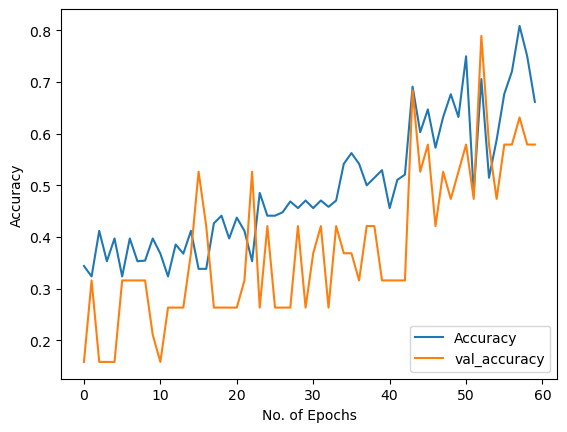

In [53]:
plt.plot(history2.history['accuracy'],label='Accuracy')
plt.plot(history2.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

In [54]:
test_Accuracy2 = model_hp1.evaluate(x_test,y_test)
print(f"Model's Accuracy : {test_Accuracy2[1]*100}")

1/1 [==============================] - 0s 108ms/step - loss: 0.6853 - accuracy: 0.7895
Model's Accuracy : 78.94737124443054


    ** Data augmented model is giving an accuracy of 78%

## MLPClassifier

In [55]:
from sklearn.neural_network import MLPClassifier

x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

model_mlp = MLPClassifier(hidden_layer_sizes=(100,3),
                          learning_rate_init=0.0001,
                          max_iter=75,
                          random_state=12)

model_mlp.fit(x_train_flattened, y_train)

MLPClassifier(hidden_layer_sizes=(100, 3), learning_rate_init=0.0001,
              max_iter=75, random_state=12)

In [56]:
from sklearn.metrics import classification_report

y_pred = model_mlp.predict(x_test_flattened)
class_report = classification_report(y_test, y_pred, target_names=leaf_class)

print(class_report)

                       precision    recall  f1-score   support

Bacterial leaf blight       0.16      1.00      0.27         3
           Brown spot       0.00      0.00      0.00        10
            Leaf smut       0.32      1.00      0.48         6

            micro avg       0.24      0.47      0.32        19
            macro avg       0.16      0.67      0.25        19
         weighted avg       0.12      0.47      0.19        19
          samples avg       0.24      0.47      0.32        19



## Model Comparision
### 1) Main CNN model provides a accuracy of 52%.
### 2) Hyper parameter tuning model, Learning rate of 0.0001 provides 89% accuracy and it deterioates when the learning rate increases.
### 3) Data Augmentation model provides 78% accuracy
### 4) MLP was unable to identify all the disease classifications.
### 5) In conclusion CNN with Hyper parameter tuning model provides the best possible result.

## Challenges Faced
### 1) The dataset is limited, train and testing is limited aswell.
### 2) Limited knowledge on Deep learning algorithms to implement on Image processing.
### 3) Image shape, array and convertion error was hard to understand, and it took a certain amount of time to understand the code and implement the data
### 4) When compiling the model, the optimizer, loss and metrics has to be fixed when changed there is an error in the output.
### 5) loss = categorical_entropy, when just categorical_entropy is used there is an error in output and distrupts the flow process as our labels are one hot encoded for multi classes.
### 6) Applying Data Augmentation is also hard to understand,implemented on the data
### 7) In hyperparameter tuning, MLP can only identify two class, when the inout are changed the class identification varies but stil identifies only two class.
### 8) With limited dataset various models and hyperparameters were not able to be implemented as testing and validation data is required more.